# Критерии оценивания:




    в карточке представлена информация о распределении длин предложений (1 балл)

    в карточке представлена информация о распределении длин N-грамм (1 балл)

    в карточке представлена информация о распределении длин слов (1 балл)

    

Ссылка на датасет: https://huggingface.co/datasets/nastia-sheff/task_2_adv/blob/main/README.md

**Шаг 1**: Установка необходимых библиотек и загрузка текста

In [1]:
!pip install datasets nltk spacy -q

In [2]:
import re
from collections import Counter
from nltk.util import ngrams
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datasets
import nltk, spacy

In [3]:
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 50.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [5]:
!wget -O text.txt https://raw.githubusercontent.com/NastiaSheffka/comp-ling/refs/heads/main/story.txt

--2025-02-20 01:22:43--  https://raw.githubusercontent.com/NastiaSheffka/comp-ling/refs/heads/main/story.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6621 (6.5K) [text/plain]
Saving to: ‘text.txt’

text.txt            100%[===================>]   6.47K  --.-KB/s    in 0s      

2025-02-20 01:22:43 (67.8 MB/s) - ‘text.txt’ saved [6621/6621]



In [6]:
with open("text.txt", "r", encoding="utf-8") as file:
    text = file.read()

print(text[:200])

The Whispering Woods

In a small village nestled between the rolling hills of Eldergrove, there was a legend that spoke of the Whispering Woods. The villagers believed that these woods were enchanted,


**Шаг 2**: сегментация

In [7]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import string

text_sent_tokenized = [sent for sent in sent_tokenize(text)]

text_word_tokenized = [
    [word for word in word_tokenize(sent) if word not in string.punctuation]
    for sent in text_sent_tokenized
]

text_bi_tokenized = [list(ngrams(sent, 2)) for sent in text_word_tokenized]

In [8]:
print(f"НА УРОВНЕ ПРЕДЛОЖЕНИЙ: {text_sent_tokenized[3]}")
print(f"НА УРОВНЕ СЛОВ: {text_word_tokenized[3]}")
print(f"НА УРОВНЕ БИГРАМ: {text_bi_tokenized[3]}")

НА УРОВНЕ ПРЕДЛОЖЕНИЙ: Lila, a curious and adventurous girl of twelve, had grown up hearing stories of the Whispering Woods from her grandmother.
НА УРОВНЕ СЛОВ: ['Lila', 'a', 'curious', 'and', 'adventurous', 'girl', 'of', 'twelve', 'had', 'grown', 'up', 'hearing', 'stories', 'of', 'the', 'Whispering', 'Woods', 'from', 'her', 'grandmother']
НА УРОВНЕ БИГРАМ: [('Lila', 'a'), ('a', 'curious'), ('curious', 'and'), ('and', 'adventurous'), ('adventurous', 'girl'), ('girl', 'of'), ('of', 'twelve'), ('twelve', 'had'), ('had', 'grown'), ('grown', 'up'), ('up', 'hearing'), ('hearing', 'stories'), ('stories', 'of'), ('of', 'the'), ('the', 'Whispering'), ('Whispering', 'Woods'), ('Woods', 'from'), ('from', 'her'), ('her', 'grandmother')]


In [9]:
import pandas as pd

In [10]:
data = {

      "tokenization by sentences": text_sent_tokenized,
      "tokenization by words": text_word_tokenized,
      "tokenization by bigrams": text_bi_tokenized,
  }

df = pd.DataFrame(data)

df.head()

,tokenization by sentences,tokenization by words,tokenization by bigrams
0,The Whispering Woods\n\nIn a small village nes...,"[The, Whispering, Woods, In, a, small, village...","[(The, Whispering), (Whispering, Woods), (Wood..."
1,The villagers believed that these woods were e...,"[The, villagers, believed, that, these, woods,...","[(The, villagers), (villagers, believed), (bel..."
2,"Many had ventured into the woods, but few retu...","[Many, had, ventured, into, the, woods, but, f...","[(Many, had), (had, ventured), (ventured, into..."
3,"Lila, a curious and adventurous girl of twelve...","[Lila, a, curious, and, adventurous, girl, of,...","[(Lila, a), (a, curious), (curious, and), (and..."
4,"Her grandmother would sit by the fire, her voi...","[Her, grandmother, would, sit, by, the, fire, ...","[(Her, grandmother), (grandmother, would), (wo..."


**Шаг 3**:

1. произведите любые 3 типа статистического анализа, используйте образцы ниже
2. опишите, какую информацию вы можете получить на основе проведенного анализа
3. далее: оформите результаты вашего анализа в карточке датасета


**1. Анализ уникальности данных**

In [11]:
words = [word for word in word_tokenize(text) if word not in string.punctuation]
unique_words = set(words)
lexical_diversity = len(unique_words) / len(words)

print(f"TTR = {lexical_diversity}")

TTR = 0.38275862068965516


На основе анализа уникальности данных можно сделать выводы о разнообразии использованного словарного запаса, что, в свою очередь, может указывать на особенности стиля автора, тематики текста и тп.

**2. Анализ биграмм и триграмм**


In [36]:
bigrams = list(ngrams(words, 2))
trigrams = list(ngrams(words, 3))
bigram_counts = Counter(bigrams).most_common(5)
trigram_counts = Counter(trigrams).most_common(5)
print(f'5 наиболее частых биграмм: {bigram_counts}')
print(f'5 наиболее частых триграмм: {trigram_counts}')

5 наиболее частых биграмм: [(('the', 'woods'), 16), (('of', 'the'), 13), (('and', 'the'), 10), (('the', 'Whispering'), 9), (('Whispering', 'Woods'), 8)]
5 наиболее частых триграмм: [(('the', 'Whispering', 'Woods'), 7), (('of', 'the', 'woods'), 5), (('Lila', '’', 's'), 4), (('of', 'the', 'Whispering'), 3), (('stories', 'of', 'the'), 3)]


На основе анализа биграмм и триграмм можно сделать выводы о ключевых словах и выражениях и, соответстенно, о стилистике текста.



**3. TF-IDF**


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(text_sent_tokenized)
feature_names = tfidf_vectorizer.get_feature_names_out()

print(tfidf_matrix.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.26515715 0.        ]]


In [37]:
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
print(df_tfidf.head)

<bound method NDFrame.head of     about  ached  adventurous  ago  air  alive  all   am   ancient       and  \
0     0.0    0.0      0.00000  0.0  0.0    0.0  0.0  0.0  0.000000  0.000000   
1     0.0    0.0      0.00000  0.0  0.0    0.0  0.0  0.0  0.271042  0.000000   
2     0.0    0.0      0.00000  0.0  0.0    0.0  0.0  0.0  0.000000  0.000000   
3     0.0    0.0      0.29662  0.0  0.0    0.0  0.0  0.0  0.000000  0.123900   
4     0.0    0.0      0.00000  0.0  0.0    0.0  0.0  0.0  0.000000  0.196240   
..    ...    ...          ...  ...  ...    ...  ...  ...       ...       ...   
71    0.0    0.0      0.00000  0.0  0.0    0.0  0.0  0.0  0.000000  0.114395   
72    0.0    0.0      0.00000  0.0  0.0    0.0  0.0  0.0  0.000000  0.122569   
73    0.0    0.0      0.00000  0.0  0.0    0.0  0.0  0.0  0.000000  0.114456   
74    0.0    0.0      0.00000  0.0  0.0    0.0  0.0  0.0  0.000000  0.109367   
75    0.0    0.0      0.00000  0.0  0.0    0.0  0.0  0.0  0.000000  0.110758   

    ...  

На основе анализа TF-IDF можно сделать выводы о важности слов, выявив ключевые слова и фразы, определить уникальные стилистические элементы.


**4. Анализ распределений**

In [39]:
import numpy as np

In [47]:
def stats(data, name):
    mean_val = np.mean(data)
    std_val = np.std(data)
    median_val = np.median(data)
    quartiles_val = np.percentile(data, [25, 50, 75])

    print (f'Средняя длина {name}: {mean_val}')
    print (f'Медиана: {median_val}')
    print (f'Стандартное отклонение: {std_val}')
    print (f'Квартили: {quartiles_val}')

In [48]:
def histograms(length, obj):
    plt.figure(figsize=(10, 5))
    plt.hist(length, bins=range(min(length), max(length) + 1), edgecolor='black')
    plt.xlabel(f'Длина {obj}')
    plt.ylabel(f'Частота')
    plt.title(f'Распределение длин {obj}')

Средняя длина sentences: 83.80263157894737
Медиана: 75.0
Стандартное отклонение: 41.87481963412596
Квартили: [ 57.  75. 106.]


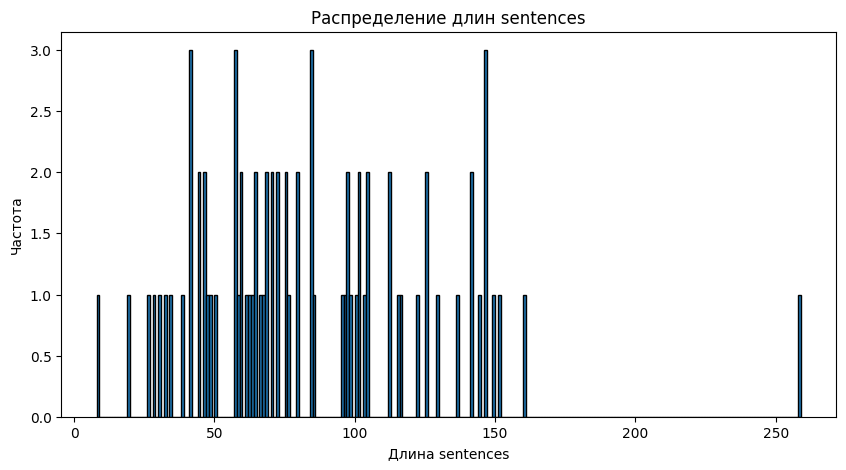

In [49]:
sentence_lengths = [len(sent) for sent in text_sent_tokenized]
stats(sentence_lengths, "sentences")
histograms(sentence_lengths, 'sentences')

Средняя длина words: 4.445689655172414
Медиана: 4.0
Стандартное отклонение: 2.323155265246968
Квартили: [3. 4. 6.]


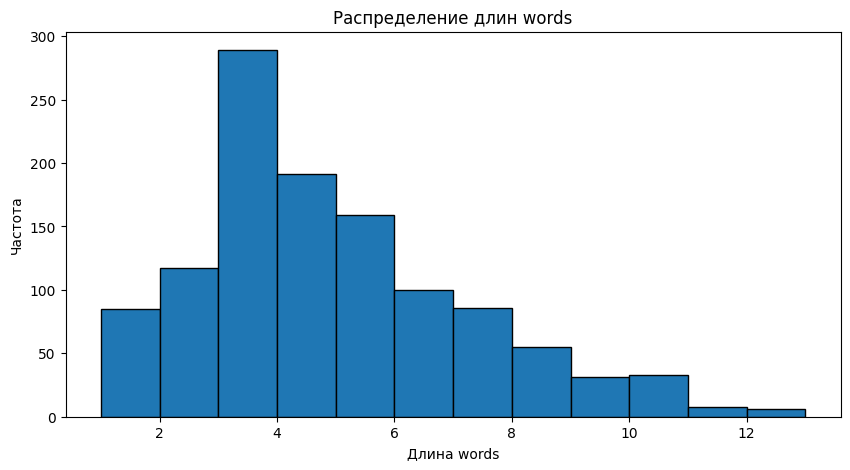

In [50]:
words_lengths = [len(word) for word in words]
stats(words_lengths, "words")
histograms(words_lengths, 'words')

Средняя длина bigrams: 4.445689655172414
Медиана: 4.0
Стандартное отклонение: 2.323155265246968
Квартили: [3. 4. 6.]


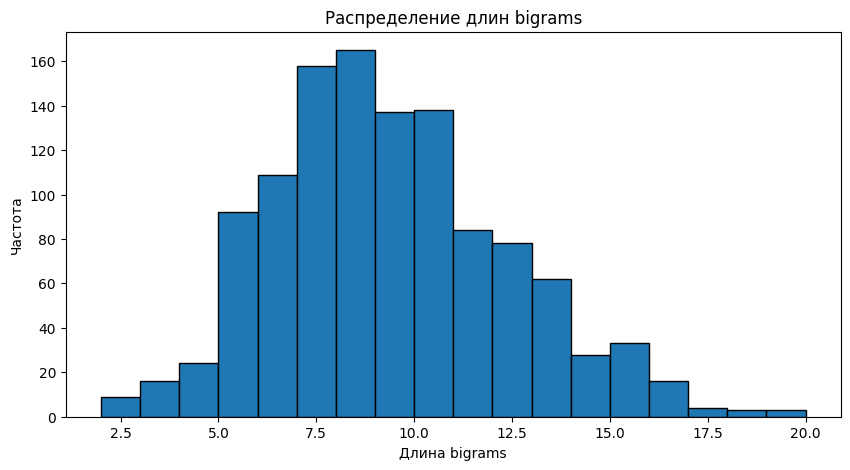

In [51]:
bigrams_lengths = [len(bigram[0])+len(bigram[1]) for bigram in bigrams]
stats(words_lengths, 'bigrams')
histograms(bigrams_lengths, 'bigrams')

Средняя длина trigrams: 4.445689655172414
Медиана: 4.0
Стандартное отклонение: 2.323155265246968
Квартили: [3. 4. 6.]


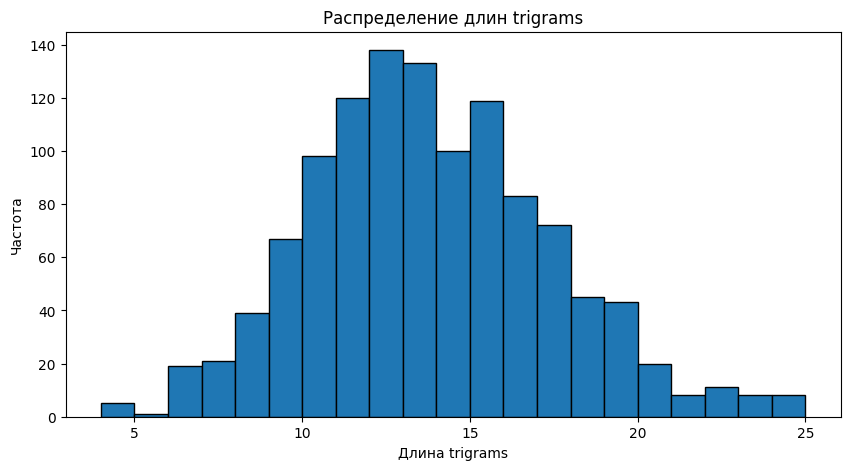

In [52]:
trigrams_lengths = [len(trigram[0])+len(trigram[1])+len(trigram[2]) for trigram in trigrams]
stats(words_lengths, 'trigrams')
histograms(trigrams_lengths, 'trigrams')

**Шаг 4**: визуализируйте данные по образцу

In [28]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
stopwords = set(stopwords.words('english'))

text_without_stopwords = [re.sub('[^\w\s]', '', word) for word in word_tokenize(text) if word.lower() not in stopwords]

print(text_without_stopwords[:600])

['Whispering', 'Woods', 'small', 'village', 'nestled', 'rolling', 'hills', 'Eldergrove', '', 'legend', 'spoke', 'Whispering', 'Woods', '', 'villagers', 'believed', 'woods', 'enchanted', '', 'filled', 'ancient', 'trees', 'could', 'communicate', 'dared', 'listen', '', 'Many', 'ventured', 'woods', '', 'returned', 'tales', 'secrets', 'uncovered', '', 'Lila', '', 'curious', 'adventurous', 'girl', 'twelve', '', 'grown', 'hearing', 'stories', 'Whispering', 'Woods', 'grandmother', '', 'grandmother', 'would', 'sit', 'fire', '', 'voice', 'low', 'mysterious', '', 'recounting', 'tales', 'brave', 'souls', 'entered', 'woods', 'search', 'wisdom', 'treasure', '', 'Lila', 's', 'heart', 'raced', 'excitement', 'every', 'time', 'heard', 'stories', '', 'knew', 'one', 'day', '', 'would', 'explore', 'woods', '', 'One', 'crisp', 'autumn', 'morning', '', 'leaves', 'swirling', 'shades', 'gold', 'crimson', '', 'Lila', 'decided', 'time', 'uncover', 'truth', 'Whispering', 'Woods', '', 'packed', 'small', 'backpack'

In [30]:
word_counts = Counter(text_without_stopwords)

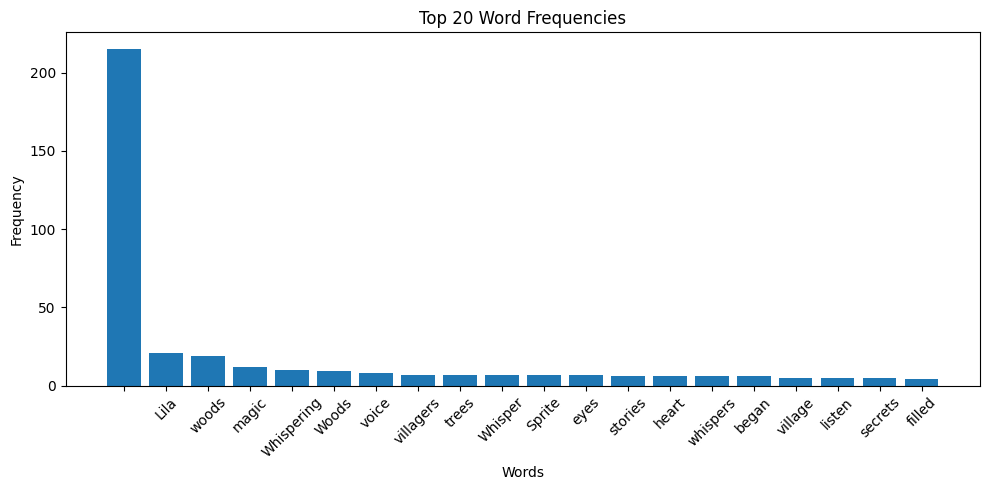

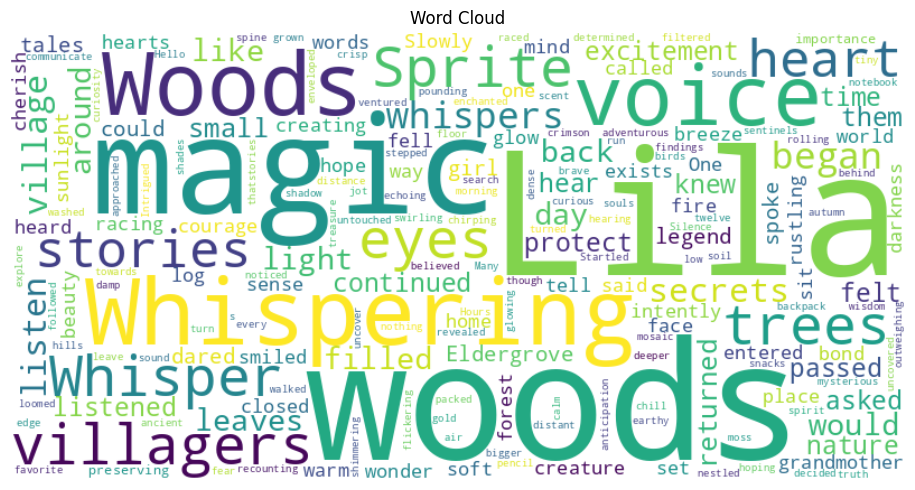

In [31]:
# Word Frequency Plot
plt.figure(figsize=(10, 5))
plt.bar(*zip(*word_counts.most_common(20)))
plt.title("Top 20 Word Frequencies")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("word_frequency_plot.png")
plt.show()

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")
plt.tight_layout()
plt.savefig("word_cloud.png")
plt.show()

#В тексте часто встречаются кавыски, от которых было сложно избавиться.
#Теперь тут куча пробелов, которые портят частотность, но я не знаю, что с этим делать...

**Шаг 5**: отправляем на HF Datasets сегментированные данные и оформляем карточку



In [32]:
from datasets import Dataset
dataset = Dataset.from_pandas(df)

dataset.push_to_hub("nastia-sheff/task_2_adv", token='')

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/nastia-sheff/task_2_adv/commit/4b3213ac9de9435b21b8b76083e4e1e0b8e86000', commit_message='Upload dataset', commit_description='', oid='4b3213ac9de9435b21b8b76083e4e1e0b8e86000', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/nastia-sheff/task_2_adv', endpoint='https://huggingface.co', repo_type='dataset', repo_id='nastia-sheff/task_2_adv'), pr_revision=None, pr_num=None)

In [21]:
dataset

Dataset({
    features: ['tokenization by sentences', 'tokenization by words', 'tokenization by bigrams'],
    num_rows: 76
})